In [5]:
import pandas as pd
import numpy as np

In [6]:
source_data = pd.read_csv("final_data.csv", index_col=0)
source_data.dropna(how='any',inplace=True) # 處理缺失直

source_data = source_data.reindex(index=source_data.index[::-1])

source_data
# target_1 為未來三天的漲跌加總，target_2 為蔣總後的正負。

,漲跌,動盪,交易量,自營商,投信,外資,3日,4日,5日,6日,7日,8日,9日,10日,target_1,target_2
日期,,,,,,,,,,,,,,,,
2004/7/1,-2.53,59.71,692.00694,7.329094,-0.221718,9.635603,30.95333,54.9825,50.858,52.01833,59.96000,87.51125,107.52333,114.027,-103.34,0
2004/7/2,-90.21,58.99,531.13441,-13.862259,-16.050376,-82.260722,-60.98333,-44.4425,-28.182,-32.79333,-32.73571,-26.46875,-2.39889,15.582,-18.92,0
2004/7/5,-86.92,79.36,440.94036,-14.960335,-19.800116,-16.629336,-88.01667,-110.9275,-105.090,-95.91833,-102.61143,-104.69875,-100.79000,-80.387,53.61,1
2004/7/6,73.79,76.65,414.49502,3.310531,-7.703426,-0.348274,20.22000,-10.6700,-29.710,-26.08333,-18.96714,-25.21875,-27.47444,-24.300,44.15,1
2004/7/7,-5.79,101.45,503.79043,-4.501554,6.698410,-1.273157,20.73667,10.8225,-13.168,-29.58333,-27.32000,-21.66250,-27.56333,-29.938,30.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/8/14,32.33,122.12,2145.85977,4.332400,6.888281,39.489178,52.48000,43.1775,14.834,6.79333,-11.04000,-10.51500,0.15778,28.385,-16.82,0
2020/8/17,160.65,155.42,2228.58664,12.277874,7.280122,96.455224,117.87667,159.8475,163.062,146.23667,143.52286,130.90875,133.45333,144.727,-593.47,0
2020/8/18,-83.97,141.33,2504.51420,-5.175571,-0.132520,-29.954802,-2.43000,25.4300,60.702,65.91000,53.37143,52.10875,41.72333,44.535,-264.30,0


In [7]:
def data_preprocess(df, time_frame):
    
    data_value = df.to_numpy()  # 將 data_frame 轉為  numpy array
    
    result = []
    for index in range(len(data_value) - time_frame):
        result.append(data_value[index: index + time_frame])
    
    result = np.array(result)
    number_train = round(0.9 * result.shape[0]) # 90% 資料用來訓練
    
    # 訓練資料
    x_train = result[:int(number_train), :, :-2]
    y_train = result[:int(number_train), -1, -1]
    # 測試資料
    x_test = result[int(number_train):, :, :-2]
    y_test = result[int(number_train):, -1, -1]


    mean = x_train.mean(axis=0) # 沿著第 0 軸算平均
    x_train -= mean # 訓練資料集減掉平均值
    std = x_train.std(axis=0)
    x_train /= std

    # 測試資料也要做。
    x_test -= mean
    x_test /= std

    print("mean = ", mean)
    print("std = ", std)
    
    
    
    return [x_train, y_train, x_test, y_test]
    

In [8]:
x_train, y_train, x_test, y_test = data_preprocess(source_data, 20)

mean =  [[ 1.13299356e+00  8.54931112e+01  1.00443064e+03  1.11469358e-01
  -6.48026903e-01  7.27958618e+00  1.14203593e+00  1.71465416e+00
   2.28016914e+00  2.83865065e+00  3.39700165e+00  3.96225672e+00
   4.53179468e+00  5.10404060e+00]
 [ 1.13444973e+00  8.54958807e+01  1.00471664e+03  1.10439591e-01
  -6.47110944e-01  7.27787471e+00  1.13396443e+00  1.70736418e+00
   2.27928311e+00  2.84551568e+00  3.40551467e+00  3.96501995e+00
   4.53040572e+00  5.09961999e+00]
 [ 1.22967516e+00  8.55268384e+01  1.00504600e+03  1.17493698e-01
  -6.40051328e-01  7.31684601e+00  1.19793344e+00  1.77272963e+00
   2.34963148e+00  2.92413184e+00  3.49302077e+00  4.05579109e+00
   4.61750675e+00  5.18407281e+00]
 [ 1.23880146e+00  8.55226267e+01  1.00533075e+03  1.21344711e-01
  -6.32340067e-01  7.31106172e+00  1.23575944e+00  1.82755111e+00
   2.40922487e+00  2.99036072e+00  3.56822859e+00  4.14034444e+00
   4.70630447e+00  5.27067740e+00]
 [ 1.17142817e+00  8.55226379e+01  1.00553817e+03  1.1679217

In [9]:
# 把 labels 也轉成向量

y_train = np.asarray(y_train).astype('float32') # 向量化，轉成 1D 陣列。
y_test = np.asarray(y_test).astype('float32') # 向量化，轉成 1D 陣列。

print("x_train: ", x_test)
print("y_train: ", y_test)

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

x_train:  [[[ 0.01793939 -0.32547723  2.11780863 ...  0.71790089  0.70538635
    0.63235793]
  [ 2.90280313  1.72119285  2.09795649 ...  2.25711333  2.18822976
    2.11881315]
  [-0.64781239 -0.43414625  1.35136949 ...  1.48355261  1.52220193
    1.51785961]
  ...
  [-0.08913571 -0.81552217 -0.94814807 ... -0.59209488 -0.67568794
   -0.70125501]
  [-1.32509621 -0.09972004 -0.81145268 ... -1.21972266 -1.22064862
   -1.26941817]
  [-0.57336563  0.67788624 -0.93152584 ... -1.29233026 -1.33015396
   -1.33758825]]

 [[ 2.90281952  1.7212079   2.09987147 ...  2.25716716  2.18820395
    2.11873952]
  [-0.64736142 -0.4336743   1.35280669 ...  1.48529633  1.52384806
    1.5193855 ]
  [-1.95918543 -0.18090769  0.44822534 ... -0.0368193   0.16137017
    0.26715548]
  ...
  [-1.32493412 -0.09968228 -0.81089071 ... -1.21966207 -1.2205633
   -1.26927168]
  [-0.57404478  0.67733168 -0.93127621 ... -1.29292332 -1.33071908
   -1.3381417 ]
  [ 1.87893785  0.62364142 -0.55976682 ...  0.02994087 -0.044463

In [10]:
from keras import models, layers
from keras import  optimizers, losses, metrics
from keras_layer_normalization import LayerNormalization

def build_model(input_length, input_dim, d_rate=0.3):
    model = models.Sequential()
#     model.add(layers.Dense(256, activation='relu', input_shape=(inp_dim,))) # hidden_layer
#     model.add(layers.Dense(256, activation='relu')) # hidden_layer
#     model.add(layers.Dense(256, activation='relu')) # hidden_layer

    model.add(layers.LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(layers.Dropout(d_rate))

    model.add(layers.LSTM(256, return_sequences=False))
    model.add(layers.Dropout(d_rate))
    
    
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # output_layer
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),  # learning_rate 訂為 0.001
              loss=losses.binary_crossentropy,  # 損失函數
              metrics=[metrics.binary_accuracy]) # 評量函數使用 accuracy
    
    return model

In [11]:
model = build_model(20, 14)

In [12]:
history = model.fit(x_train, y_train, batch_size=8, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
447/447 [==============================] - 12s 26ms/step - loss: 0.7045 - binary_accuracy: 0.5262 - val_loss: 0.7115 - val_binary_accuracy: 0.4282
Epoch 2/30
447/447 [==============================] - 11s 26ms/step - loss: 0.7007 - binary_accuracy: 0.5307 - val_loss: 0.6860 - val_binary_accuracy: 0.6096
Epoch 3/30
447/447 [==============================] - 12s 28ms/step - loss: 0.6986 - binary_accuracy: 0.5391 - val_loss: 0.6959 - val_binary_accuracy: 0.5491
Epoch 4/30
447/447 [==============================] - 12s 28ms/step - loss: 0.6938 - binary_accuracy: 0.5410 - val_loss: 0.6863 - val_binary_accuracy: 0.6096
Epoch 5/30
447/447 [==============================] - 12s 28ms/step - loss: 0.6929 - binary_accuracy: 0.5365 - val_loss: 0.6897 - val_binary_accuracy: 0.5995
Epoch 6/30
447/447 [==============================] - 12s 28ms/step - loss: 0.6917 - binary_accuracy: 0.5433 - val_loss: 0.7072 - val_binary_accuracy: 0.5894
Epoch 7/30
447/447 [==============================] 

In [13]:
history = history.history

loss = history.get("loss")
bin_acc = history.get("binary_accuracy")
val_loss = history.get("val_loss")
val_bin_acc = history.get("val_binary_accuracy")

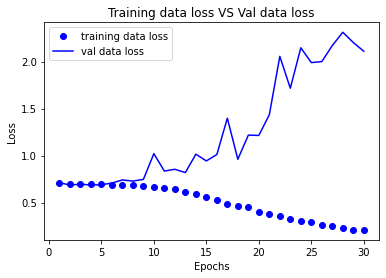

In [14]:
from matplotlib import pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="training data loss")
plt.plot(epochs, val_loss, 'b', label="val data loss")
plt.title("Training data loss VS Val data loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend() # 顯示圖表線型名稱

plt.show()

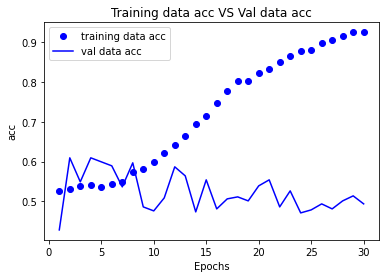

In [15]:
plt.plot(epochs, bin_acc, 'bo', label="training data acc")
plt.plot(epochs, val_bin_acc, 'b', label="val data acc")
plt.title("Training data acc VS Val data acc")
plt.xlabel("Epochs")
plt.ylabel("acc")

plt.legend() # 顯示圖表線型名稱

plt.show()

## input.shape == (batch_size, seq_len, dim)

*  input.shape == (0, 20, 14)

In [ ]:
model.evaluate()